# Plots for DPY-27 GFP, GFP and H2B-GFP

In [1]:
# import packackes 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import math
from scipy import stats
from matplotlib import rcParams

In [2]:
#read in the database
df = pd.read_csv('.../database/FRAP_database_2.csv')

df.time_steps = df.time_steps.apply(lambda x: np.array(x[1:-1].split(',')).astype(float))
df.bleach_values = df.bleach_values.apply(lambda x: np.array(x[1:-1].split(',')).astype(float))

df.head()

,filename,experiment,protein,condition,tau,t_half,t_half2,mobile_fraction,bleach_values,time_steps,sse,rsquare,date,strain,immobile_fraction
0,200530_SPL8_hs1hr35_rc8hr20_lif_-_FRAP_006_pya...,200530_spl8,DPY-27,NaN,5.805892,4.18,3.30,0.374834,"[1.060889, 1.008881, 1.053333, 1.02661, 1.0139...","[0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76...",0.249890,0.49793,200530,spl8,0.625166
1,200530_SPL8_hs1hr35_rc8hr20_lif_-_FRAP_007_pya...,200530_spl8,DPY-27,NaN,8.318542,5.94,3.96,0.264699,"[1.04635, 1.104421, 0.967013, 1.027364, 1.0217...","[0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76...",0.172830,0.47933,200530,spl8,0.735301
2,200530_SPL8_hs1hr35_rc8hr20_lif_-_FRAP_009_pya...,200530_spl8,DPY-27,NaN,1.604541,1.32,0.88,0.203197,"[1.054365, 1.025518, 1.035296, 1.023328, 1.027...","[0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76...",0.175220,0.19545,200530,spl8,0.796803
3,200530_SPL8_hs1hr35_rc8hr20_lif_-_FRAP_029_pya...,200530_spl8,DPY-27,NaN,2.419760,1.98,1.10,0.166205,"[1.037188, 1.056412, 1.042269, 0.994047, 1.031...","[0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76...",0.121620,0.10477,200530,spl8,0.833795
4,200530_SPL8_hs1hr35_rc8hr20_lif_-_FRAP_030_pya...,200530_spl8,DPY-27,NaN,8.138622,5.94,4.18,0.133133,"[1.045889, 1.021138, 0.995914, 1.00209, 1.0034...","[0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76...",0.074685,0.41250,200530,spl8,0.866867


In [3]:
# Select the data you want to plot from the database
sns.reset_defaults()

Sample1 = df.loc[df['protein'] == 'H2B-GFP']
Sample2 = df.loc[df['protein'] == 'free-GFP']
Sample3 = df.loc[df['protein'] == 'DPY-27']


In [4]:
# select a folder for saving the final plots
outpath = '.../plots/'

# Mobile fraction plots¶

In [5]:
###### Cross Checking with the internal scipy function
t, p = stats.ttest_ind(Sample1['mobile_fraction'],Sample2['mobile_fraction'], equal_var = True)
print("t-statistic of "  + str(np.unique(Sample1['protein'])) + " vs "+ str(np.unique(Sample2['protein']))+ "= " + str(t))
print("p-value of "  + str(np.unique(Sample1['protein'])) + " vs "+ str(np.unique(Sample2['protein']))+ " = " + str(p))


t1, p1 = stats.ttest_ind(Sample1['mobile_fraction'],Sample3['mobile_fraction'], equal_var = True)
print("t-statistic of "  + str(np.unique(Sample1['protein'])) + " vs "+ str(np.unique(Sample3['protein']))+ "= " + str(t1))
print("p-value of "  + str(np.unique(Sample1['protein'])) + " vs "+ str(np.unique(Sample3['protein']))+ " = " + str(p1))


t2, p2 = stats.ttest_ind(Sample2['mobile_fraction'],Sample3['mobile_fraction'], equal_var = True)
print("t-statistic of "  + str(np.unique(Sample2['protein'])) + " vs "+ str(np.unique(Sample3['protein']))+ "= " + str(t2))
print("p-value of "  + str(np.unique(Sample2['protein'])) + " vs "+ str(np.unique(Sample3['protein']))+ " = " + str(p2))

t-statistic of ['H2B-GFP'] vs ['free-GFP']= -44.54324776352897
p-value of ['H2B-GFP'] vs ['free-GFP'] = 6.751409449172939e-71
t-statistic of ['H2B-GFP'] vs ['DPY-27']= -15.058273572291412
p-value of ['H2B-GFP'] vs ['DPY-27'] = 4.50364203582966e-31
t-statistic of ['free-GFP'] vs ['DPY-27']= 29.05646546768297
p-value of ['free-GFP'] vs ['DPY-27'] = 5.9473407941957494e-58


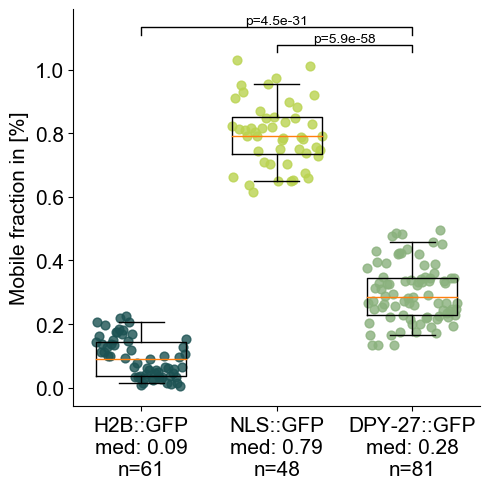

In [6]:
sns.reset_defaults()
# Select the 'mobile_fraction' column of the data for the subsetted data
Sample1_plot = Sample1['mobile_fraction']
Sample2_plot = Sample2['mobile_fraction']
Sample3_plot = Sample3['mobile_fraction']

# Set font and size
rcParams['font.sans-serif'] = ['Arial']

# Create figure instance
fig, ax = plt.subplots(figsize=(5, 5))



# Create scatter y values for plotting

yscale1=np.linspace(0., 0.4, len(Sample1_plot))
yscale2=np.linspace(0.6, 1.0, len(Sample2_plot))
yscale3=np.linspace(1.2, 1.6, len(Sample3_plot))



#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



# Feed the data for plotting with different colours
data = (Sample1_plot, Sample2_plot, Sample3_plot)


plt.scatter( yscale1,Sample1_plot,  color='#1C5253', s=40,alpha=0.80, )
plt.scatter( yscale2,Sample2_plot,  color='#BAD350', s=40,alpha=0.80)
plt.scatter( yscale3,Sample3_plot, color='#8AB17D', s=40,alpha=0.80)


# Add the boxplots
plt.boxplot(data, widths=0.4, sym='', whis=[5, 95], vert=True, positions=[0.2,0.8,1.4])


# Create labels and axis
plt.xticks([0.2,0.8,1.4], 
           ['H2B::GFP'  + '\nmed: '+ str(np.median(Sample1_plot).round(2))+ '\nn=' +str(len(Sample1_plot)), 
            'NLS::GFP' + '\nmed: '+ str(np.median(Sample2_plot).round(2))+ '\nn=' +str(len(Sample2_plot)),
            'DPY-27::GFP' + '\nmed: '+ str(np.median(Sample3_plot).round(2))+ '\nn=' +str(len(Sample3_plot)),
              ]
,fontsize=10, rotation=0)
#plt.title('Mobile fractions for different datasets')
#plt.xticks([0,0.1,0.2,0.3,0.4,1.0,1.2,1.8])
plt.ylabel('Mobile fraction in [%]', fontsize=15) 
#plt.ylim(0.8, 1)
plt.xlim(-0.1,1.7)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
 
###### statistical annotation
# 1st and 2nd
x1, x2 = 0.8, 1.4  
y, h, col = Sample2['mobile_fraction'].max() + 0.025, 0.025, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h,"p=""{0:.1e}".format(p2) , ha='center', va='bottom', color=col)  

# 1st and 3nd
x1, x2 = 0.2, 1.4  
y, h, col = Sample2['mobile_fraction'].max() + 0.08, 0.025, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "p=""{0:.1e}".format(p1), ha='center', va='bottom', color=col) 



#  Show and save the figure
plt.tight_layout()
plt.savefig((outpath +'Mobile_fraction_for_H2B-free-GFP.pdf'), dpi=300)
plt.savefig((outpath +'Mobile_fraction_for_H2B-free-GFP.svg'), dpi=300)
plt.show()

# Immobile fraction plots

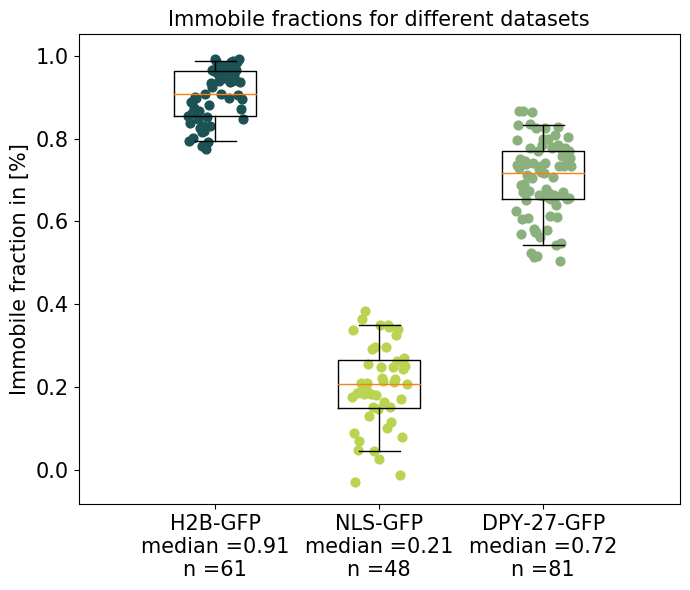

In [7]:
sns.reset_defaults()
# Select the 'tau' column of the data for the subsetted data
Sample1_plot = Sample1['immobile_fraction']
Sample2_plot = Sample2['immobile_fraction']
Sample3_plot = Sample3['immobile_fraction']


# Create figure instance
plt.figure(figsize=(7, 6))



# Create scatter y values for plotting
yscale1=np.linspace(0.1, 0.3, len(Sample1_plot))
yscale2=np.linspace(0.7, 0.9, len(Sample2_plot))
yscale3=np.linspace(1.3, 1.5, len(Sample3_plot))





# Feed the data for plotting with different colours
data = (Sample1_plot, Sample2_plot, Sample3_plot)

plt.scatter( yscale1,Sample1_plot,  color='#1C5253', s=40)
plt.scatter( yscale2,Sample2_plot,  color='#BAD350', s=40)
plt.scatter( yscale3,Sample3_plot, color='#8AB17D', s=40)



# Add the boxplots
plt.boxplot(data, widths=0.3, sym='', whis=[5, 95], vert=True, positions=[0.2,0.8,1.4])



# Create labels and axis
plt.xticks([0.2,0.8,1.4], 
           ['H2B-GFP'  + '\nmedian ='+ str(np.median(Sample1_plot).round(2))+ '\nn =' +str(len(Sample1_plot)), 
            'NLS-GFP' + '\nmedian ='+ str(np.median(Sample2_plot).round(2))+ '\nn =' +str(len(Sample2_plot)),
            'DPY-27-GFP' + '\nmedian ='+ str(np.median(Sample3_plot).round(2))+ '\nn =' +str(len(Sample3_plot)),
              ]
,fontsize=10, rotation=0)
plt.title('Immobile fractions for different datasets', fontsize=15)
#plt.xticks([0,0.1,0.2,0.3,0.4,1.0,1.2,1.8])
plt.ylabel('Immobile fraction in [%]', fontsize=15) 
#plt.ylim(0.8, 1)
#plt.xlim(0,100)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
 
###### statistical annotation
# 1st and 2nd
#x1, x2 = 0.3, 0.8  
#y, h, col = Sample2['mobile_fraction'].max() + 0.025, 0.025, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h,"p=""{0:.1e}".format(p) , ha='center', va='bottom', color=col)  

# 1st and 3nd
#x1, x2 = 0.3, 1.3  
#y, h, col = Sample2['mobile_fraction'].max() + 0.05, 0.05, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "p=""{0:.1e}".format(p2), ha='center', va='bottom', color=col) 


# 1st and 4nd
#x1, x2 = 0.3, 1.8  
#y, h, col = Sample2['mobile_fraction'].max() + 0.075, 0.075, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "p=""{0:.1e}".format(p3), ha='center', va='bottom', color=col) 



#  Show and save the figure
plt.tight_layout()
plt.savefig((outpath +'Immobile_fraction_for_H2B-free-GFP.pdf'), dpi=300)
plt.show()

# Tau plots¶

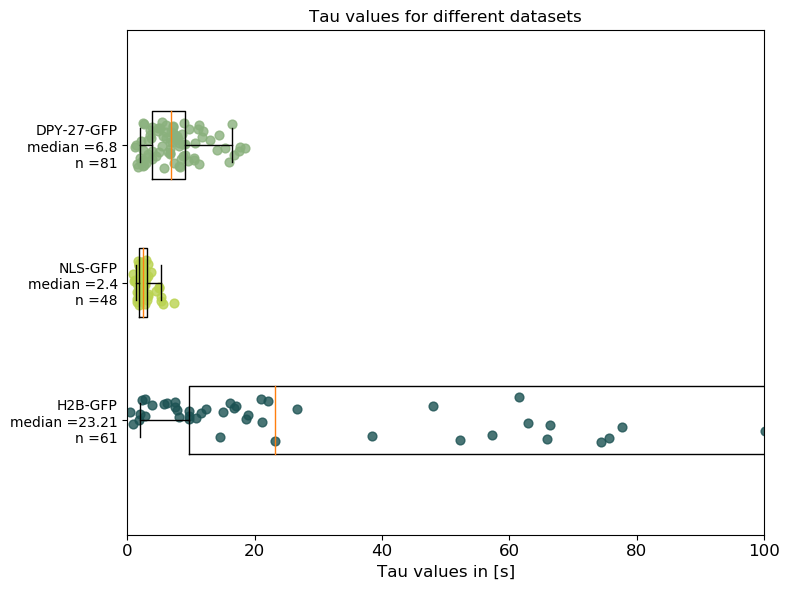

In [8]:
# Select the 'tau' column of the data for the subsetted data
Sample1_plot = Sample1['tau']
Sample2_plot = Sample2['tau']
Sample3_plot = Sample3['tau']


# Create figure instance
plt.figure(figsize=(8, 6))



# Create scatter x values for plotting
xscale1=np.linspace(0.1, 0.3, len(Sample1_plot))
xscale2=np.linspace(0.7, 0.9, len(Sample2_plot))
xscale3=np.linspace(1.3, 1.5, len(Sample3_plot))



# Feed the data for plotting with different colours
data = (Sample1_plot, Sample2_plot, Sample3_plot)
plt.scatter(Sample1_plot, xscale1, color='#1C5253', s=40,alpha=0.80)
plt.scatter(Sample2_plot, xscale2, color='#BAD350', s=40,alpha=0.80)
plt.scatter(Sample3_plot, xscale3, color='#8AB17D', s=40,alpha=0.80)


# Add the boxplots
plt.boxplot(data, widths=0.3, sym='', whis=[5, 95], vert=False, positions=[0.2,0.8,1.4])


# Create labels and axis
plt.yticks([0.2,0.8,1.4], 
           ['H2B-GFP'  + '\nmedian ='+ str(np.median(Sample1_plot).round(2))+ '\nn =' +str(len(Sample1_plot)), 
            'NLS-GFP' + '\nmedian ='+ str(np.median(Sample2_plot).round(2))+ '\nn =' +str(len(Sample2_plot)),
            'DPY-27-GFP' + '\nmedian ='+ str(np.median(Sample3_plot).round(2))+ '\nn =' +str(len(Sample3_plot)), 
            ]
,fontsize=10, rotation=0)
           

plt.title('Tau values for different datasets')
#plt.xticks([0,0.1,0.2,0.3,0.4,1.0,1.2,1.8])
plt.xlabel('Tau values in [s]', fontsize=12) 
#plt.ylim(0.8, 1)
plt.xlim(0,100)
plt.xticks(fontsize=12)



#  Show and save the figure
plt.tight_layout()
plt.savefig((outpath +'Tau_values_for_H2B-free-GFP.pdf'), dpi=300)
plt.show()


# T-half plots

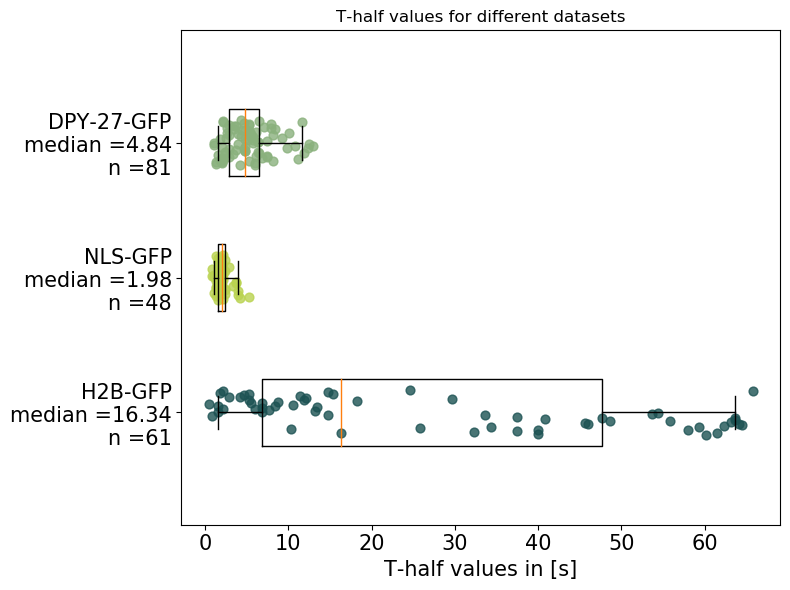

In [9]:
# Select the 't-half' column of the data for the subsetted data
Sample1_plot = Sample1['t_half']
Sample2_plot = Sample2['t_half']
Sample3_plot = Sample3['t_half']


# Create figure instance
plt.figure(figsize=(8, 6))



# Create scatter x values for plotting

xscale1=np.linspace(0.1, 0.3, len(Sample1_plot))
xscale2=np.linspace(0.7, 0.9, len(Sample2_plot))
xscale3=np.linspace(1.3, 1.5, len(Sample3_plot))



# Feed the data for plotting with different colours
data = (Sample1_plot, Sample2_plot, Sample3_plot)



plt.scatter(Sample1_plot, xscale1, color='#1C5253', s=40,alpha=0.80)
plt.scatter(Sample2_plot, xscale2, color='#BAD350', s=40,alpha=0.80)
plt.scatter(Sample3_plot, xscale3, color='#8AB17D', s=40,alpha=0.80)

# Add the boxplots
plt.boxplot(data, widths=0.3, sym='', whis=[5, 95], vert=False, positions=[0.2,0.8,1.4])


# Create labels and axis
plt.yticks([0.2,0.8,1.4], 
           ['H2B-GFP'  + '\nmedian ='+ str(np.median(Sample1_plot).round(2))+ '\nn =' +str(len(Sample1_plot)), 
            'NLS-GFP' + '\nmedian ='+ str(np.median(Sample2_plot).round(2))+ '\nn =' +str(len(Sample2_plot)),
            'DPY-27-GFP' + '\nmedian ='+ str(np.median(Sample3_plot).round(2))+ '\nn =' +str(len(Sample3_plot)), 
            ]
,fontsize=10, rotation=0)

plt.title('T-half values for different datasets')
#plt.xticks([0,0.1,0.2,0.3,0.4,1.0,1.2,1.8])
plt.xlabel('T-half values in [s]', fontsize=15) 
#plt.ylim(0.8, 1)
#plt.xlim(0,100)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)



#  Show and save the figure
plt.tight_layout()
plt.savefig((outpath +'T_half_values_for_H2B-free-GFP.pdf'), dpi=300)
plt.show()

# Tau plots 2

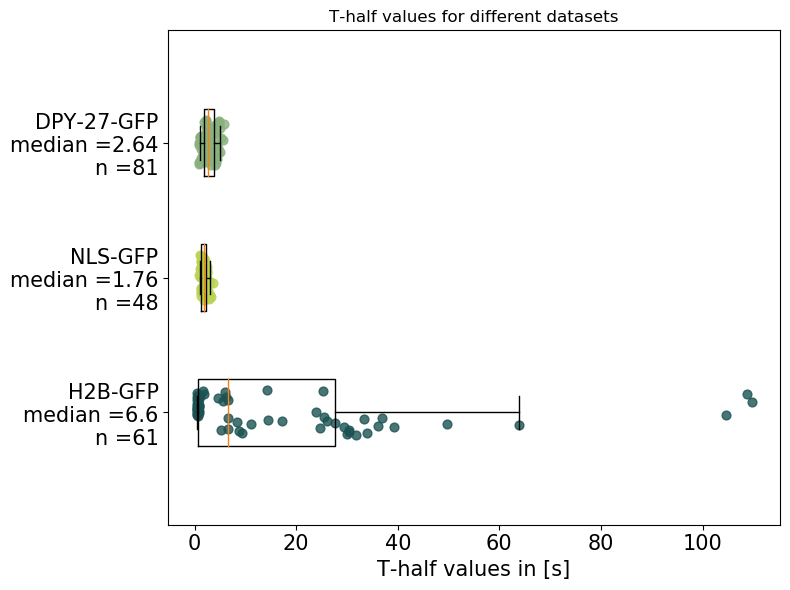

In [10]:
# Select the 't-half2' column of the data for the subsetted data
Sample1_plot = Sample1['t_half2']
Sample2_plot = Sample2['t_half2']
Sample3_plot = Sample3['t_half2']


# Create figure instance
plt.figure(figsize=(8, 6))



# Create scatter x values for plotting

xscale1=np.linspace(0.1, 0.3, len(Sample1_plot))
xscale2=np.linspace(0.7, 0.9, len(Sample2_plot))
xscale3=np.linspace(1.3, 1.5, len(Sample3_plot))



# Feed the data for plotting with different colours
data = (Sample1_plot, Sample2_plot, Sample3_plot)
plt.scatter(Sample1_plot, xscale1, color='#1C5253', s=40,alpha=0.80)
plt.scatter(Sample2_plot, xscale2, color='#BAD350', s=40,alpha=0.80)
plt.scatter(Sample3_plot, xscale3, color='#8AB17D', s=40,alpha=0.80)


# Add the boxplots
plt.boxplot(data, widths=0.3, sym='', whis=[5, 95], vert=False, positions=[0.2,0.8,1.4])


# Create labels and axis
plt.yticks([0.2,0.8,1.4], 
           ['H2B-GFP'  + '\nmedian ='+ str(np.median(Sample1_plot).round(2))+ '\nn =' +str(len(Sample1_plot)), 
            'NLS-GFP' + '\nmedian ='+ str(np.median(Sample2_plot).round(2))+ '\nn =' +str(len(Sample2_plot)),
            'DPY-27-GFP' + '\nmedian ='+ str(np.median(Sample3_plot).round(2))+ '\nn =' +str(len(Sample3_plot)), 
            ]
,fontsize=10, rotation=0)

plt.title('T-half values for different datasets')
#plt.xticks([0,0.1,0.2,0.3,0.4,1.0,1.2,1.8])
plt.xlabel('T-half values in [s]', fontsize=15) 
#plt.ylim(0.8, 1)
#plt.xlim(0,100)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)



#  Show and save the figure
plt.tight_layout()
plt.savefig((outpath +'T_half_values_for_h2b_2.pdf'), dpi=300)
plt.show()

# T-half without H2B

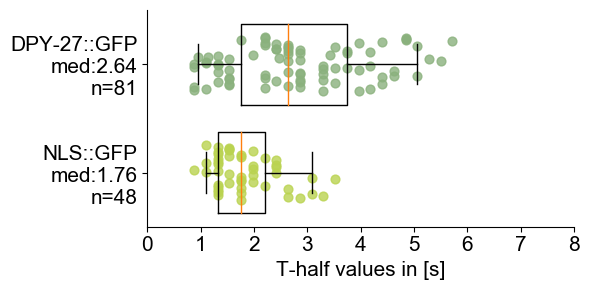

In [12]:
# Select the 't-half' column of the data for the subsetted data
#Sample1_plot = Sample1['t_half2'] # removed H2B because of the poor recovery during the expermental time frame
Sample2_plot = Sample2['t_half2']
Sample3_plot = Sample3['t_half2']



# Create figure instance
fig, ax = plt.subplots(figsize=(6, 3))

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create scatter x values for plotting

xscale2=np.linspace(0.1, 0.3, len(Sample2_plot))
xscale3=np.linspace(0.5, 0.7, len(Sample3_plot))
#xscale3=np.linspace(1.3, 1.5, len(Sample3_plot))

rcParams['font.sans-serif'] = ['Arial']

# Feed the data for plotting with different colours
data = ( Sample2_plot, Sample3_plot)
#plt.scatter(Sample1_plot, xscale1, color='#1C5253', s=40)
plt.scatter(Sample2_plot, xscale2, color='#BAD350', s=40,alpha=0.80)
plt.scatter(Sample3_plot, xscale3, color='#8AB17D', s=40,alpha=0.80)


# Add the boxplots
plt.boxplot(data, widths=0.3, sym='', whis=[5, 95], vert=False, positions=[0.2,0.6])


# Create labels and axis
plt.yticks([0.2,0.6], 
           [#'H2B-GFP'  + '\nmedian ='+ str(np.median(Sample1_plot).round(2))+ '\nn =' +str(len(Sample1_plot)), 
            'NLS::GFP' + '\nmed:'+ str(np.median(Sample2_plot).round(2))+ '\nn=' +str(len(Sample2_plot)),
            'DPY-27::GFP' + '\nmed:'+ str(np.median(Sample3_plot).round(2))+ '\nn=' +str(len(Sample3_plot)), 
            ]
,fontsize=15, rotation=0)

#plt.title('T-half values for different datasets')
#plt.xticks([0,0.1,0.2,0.3,0.4,1.0,1.2,1.8])
plt.xlabel('T-half values in [s]', fontsize=15) 
plt.ylim(0, 0.8)
plt.xlim(0,8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)



#  Show and save the figure
plt.tight_layout()
plt.savefig((outpath +'T_half_values_for_free-GFP.pdf'), dpi=300)
plt.show()

# Bleach curves

In [13]:
# read in the database
df = pd.read_csv('.../FRAP_database_2.csv')

df.time_steps = df.time_steps.apply(lambda x: np.array(x[1:-1].split(',')).astype(float))
df.bleach_values = df.bleach_values.apply(lambda x: np.array(x[1:-1].split(',')).astype(float))

In [14]:
# Subset the the dataframe for the samples needed
selected_df = df.loc[(df['protein'] == 'H2B-GFP')| (df['protein'] == 'free-GFP') | (df['protein'] =='DPY-27') ]

In [15]:
# Calculate the difference between each intensity value and check for the difference. 
#If diffrence is larger than a specific value (e.g. 0.15) take the data after that 
#and delete the same amount of timepoints from the end


bleach_values = selected_df.bleach_values.values
time_values = selected_df.time_steps.values
cropped_bleach_values = []
cropped_time_values = []
for j,(exp,time) in enumerate(zip(bleach_values,time_values)):
    for i,(value_in_exp,value_in_time) in enumerate(zip(exp,time)):
        difference = math.fabs(value_in_exp-exp[i+1])
        if difference >= 0.244:
            cropped_bleach_values.append(exp[i+1:])
            cropped_time_values.append(time[:-i-1])
            break

selected_df["bleach_values_cropped"] = cropped_bleach_values
selected_df["time_values_cropped"] = cropped_time_values
                
        

/Users/lbreima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lbreima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
#### Copy values to new column
selected_df["bleach_values_normed"]= selected_df["bleach_values_cropped"]


/Users/lbreima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
######## 0 value removed and normalised
for i in selected_df.index:
    bleach_vals = selected_df.at[i,"bleach_values_normed"]
    selected_df.at[i,"bleach_values_normed"] =  (bleach_vals - bleach_vals[0] )* (selected_df.at[i,"mobile_fraction"] /(np.mean(bleach_vals[-10:])) )

for i in selected_df.index:
    bleach_vals = selected_df.at[i,"bleach_values_normed"]
    selected_df.at[i,"bleach_values_normed"] =  (bleach_vals - bleach_vals[0] )* (selected_df.at[i,"mobile_fraction"] /(np.mean(bleach_vals[-10:])) )

selected_df.head()

,filename,experiment,protein,condition,tau,t_half,t_half2,mobile_fraction,bleach_values,time_steps,sse,rsquare,date,strain,immobile_fraction,bleach_values_cropped,time_values_cropped,bleach_values_normed
0,200530_SPL8_hs1hr35_rc8hr20_lif_-_FRAP_006_pya...,200530_spl8,DPY-27,NaN,5.805892,4.18,3.30,0.374834,"[1.060889, 1.008881, 1.053333, 1.02661, 1.0139...","[0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76...",0.249890,0.49793,200530,spl8,0.625166,"[0.466325, 0.533722, 0.478305, 0.491454, 0.481...","[0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76...","[0.0, 0.1330254332634577, 0.02364563245391072,..."
1,200530_SPL8_hs1hr35_rc8hr20_lif_-_FRAP_007_pya...,200530_spl8,DPY-27,NaN,8.318542,5.94,3.96,0.264699,"[1.04635, 1.104421, 0.967013, 1.027364, 1.0217...","[0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76...",0.172830,0.47933,200530,spl8,0.735301,"[0.500105, 0.48771, 0.505692, 0.498292, 0.5286...","[0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76...","[0.0, -0.029122735693134803, 0.013126964446756..."
2,200530_SPL8_hs1hr35_rc8hr20_lif_-_FRAP_009_pya...,200530_spl8,DPY-27,NaN,1.604541,1.32,0.88,0.203197,"[1.054365, 1.025518, 1.035296, 1.023328, 1.027...","[0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76...",0.175220,0.19545,200530,spl8,0.796803,"[0.404718, 0.401117, 0.434298, 0.451668, 0.441...","[0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76...","[0.0, -0.01075818240228193, 0.0883718510023598..."
3,200530_SPL8_hs1hr35_rc8hr20_lif_-_FRAP_029_pya...,200530_spl8,DPY-27,NaN,2.419760,1.98,1.10,0.166205,"[1.037188, 1.056412, 1.042269, 0.994047, 1.031...","[0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76...",0.121620,0.10477,200530,spl8,0.833795,"[0.506934, 0.533415, 0.542849, 0.548865, 0.558...","[0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76...","[0.0, 0.06467859060609794, 0.08772068961209967..."
4,200530_SPL8_hs1hr35_rc8hr20_lif_-_FRAP_030_pya...,200530_spl8,DPY-27,NaN,8.138622,5.94,4.18,0.133133,"[1.045889, 1.021138, 0.995914, 1.00209, 1.0034...","[0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76...",0.074685,0.41250,200530,spl8,0.866867,"[0.502396, 0.495082, 0.502635, 0.506283, 0.505...","[0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76...","[0.0, -0.015103219413078392, 0.000493528772180..."


In [20]:
Sample1 = selected_df.loc[selected_df['protein'] == 'H2B-GFP']
Sample2 = selected_df.loc[selected_df['protein'] == 'free-GFP']
Sample3 = selected_df.loc[selected_df['protein'] == 'DPY-27']




# Select the 'bleach_values' column of the data for the subsetted data
Sample1_plot = np.hstack(Sample1['bleach_values_normed'])
Sample2_plot = np.hstack(Sample2['bleach_values_normed'])
Sample3_plot = np.hstack(Sample3['bleach_values_normed'])



# Create x values for plotting
xscale1=np.hstack(Sample1['time_values_cropped'])
xscale2=np.hstack(Sample2['time_values_cropped'])
xscale3=np.hstack(Sample3['time_values_cropped'])


# Create a new dataframe for the selected samples for plotting
df_for_relplot = pd.concat([pd.DataFrame({"time": xscale1, "intensity": Sample1_plot, "sample": "H2B-GFP"}),
                            pd.DataFrame({"time": xscale2, "intensity": Sample2_plot, "sample": "free-GFP"}),
                            pd.DataFrame({"time": xscale3, "intensity": Sample3_plot, "sample": "DPY-27"}),
                                ])


In [21]:
#Cut time points afer 110 seconds for plotting 
aux_df = df_for_relplot.query('time < 65')
df_for_relplot=aux_df

In [28]:
# Create the mean intensity for each sample, has to have 150 or 295 timepoints

#### sample 1
sample1 = df_for_relplot.query('sample == "H2B-GFP"')
#print(len(sample1))
sample1_l = sample1["intensity"].values.tolist()
last_cell = []
for i,v in enumerate(sample1_l):
    if v == 0.0:
        last_cell.append(i-1)
#print (last_cell[1:])
all_experiments=[]
for i,index in enumerate(last_cell):
    try:
        all_experiments.append(sample1[last_cell[i]+1:last_cell[i+1]+1])
    except:
        pass
final_experiments = []
intensities = []
for i,df in enumerate(all_experiments):
    df.to_csv("/Users/lbreima/Documents/GitHub/FRAP_pipeline_LB2019/Python/bleach_curves/H2B-GFP/exp_{}.csv".format(i))
   # print (len(df))
    if len(df) == 150:
        final_experiments.append(df)
     
    
    intensities.append(df.intensity.values)
intensities_df = pd.DataFrame(intensities)
#print(intensities_df)
#print(intensities_df.mean(axis=0))
sample1_df = final_experiments[0]
sample1_df["intensity"] = intensities_df.mean(axis=0)
sample1_df["sem_intensity"] = intensities_df.sem(axis=0)



##### sample 2    
sample2 = df_for_relplot.query('sample == "free-GFP"')
#print(len(sample1))
sample_2 = sample2["intensity"].values.tolist()
last_cell = []
for i,v in enumerate(sample_2):
    if v == 0.0:
        last_cell.append(i-1)
#print last_cell[1:])
all_experiments=[]
for i,index in enumerate(last_cell):
    try:
        all_experiments.append(sample2[last_cell[i]+1:last_cell[i+1]+1])
    except:
        pass
final_experiments = []
intensities = []
for i,df in enumerate(all_experiments):
    df.to_csv("/Users/lbreima/Documents/GitHub/FRAP_pipeline_LB2019/Python/bleach_curves/free-GFP/exp_{}.csv".format(i))
    #print (len(df))
    if len(df) == 295:
        final_experiments.append(df)
     
    
    intensities.append(df.intensity.values)
intensities_df = pd.DataFrame(intensities)
#print(intensities_df)
#print(intensities_df.mean(axis=0))
sample2_df = final_experiments[0]
sample2_df["intensity"] = intensities_df.mean(axis=0)
sample2_df["sem_intensity"] = intensities_df.sem(axis=0)



##### sample 3    
sample3 = df_for_relplot.query('sample == "DPY-27"')
#print(len(sample1))
sample_3 = sample3["intensity"].values.tolist()
last_cell = []
for i,v in enumerate(sample_3):
    if v == 0.0:
        last_cell.append(i-1)
#print last_cell[1:])
all_experiments=[]
for i,index in enumerate(last_cell):
    try:
        all_experiments.append(sample3[last_cell[i]+1:last_cell[i+1]+1])
    except:
        pass
final_experiments = []
intensities = []
for i,df in enumerate(all_experiments):
    df.to_csv("/Users/lbreima/Documents/GitHub/FRAP_pipeline_LB2019/Python/bleach_curves/DPY-27/exp_{}.csv".format(i))
    #print (len(df))
    if len(df) == 295:
        final_experiments.append(df)
     

    intensities.append(df.intensity.values)
intensities_df = pd.DataFrame(intensities)

sample3_df = final_experiments[0]
sample3_df["intensity"] = intensities_df.mean(axis=0)
sample3_df["sem_intensity"] = intensities_df.sem(axis=0)
    

/Users/lbreima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lbreima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lbreima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [23]:
sns.reset_defaults()

/Users/lbreima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


<Figure size 2000x1500 with 0 Axes>

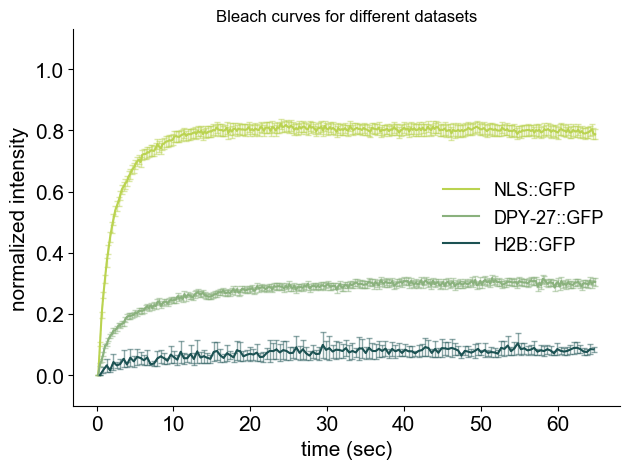

In [27]:
# Create figure instance
plt.figure(figsize=(20, 15))
rcParams['font.sans-serif'] = ['Arial']


fig, ax = plt.subplots(1,1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#Create labels and axis
plt.title('Bleach curves for different datasets')
plt.ylabel('normalized intensity', fontsize=15) 
plt.xlabel('time (sec)', fontsize=15) 

plt.ylim(-.1, 1.13)
#plt.xlim(-10,120)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

lineStyle_City_A={"linestyle":"--", "linewidth":1, "markeredgewidth":1, "elinewidth":1, "capsize":2}

plt.errorbar(data=sample2_df, x="time", y="intensity", yerr= "sem_intensity", **lineStyle_City_A, marker=',',  color='#BAD350', alpha = 0.5, label='_nolegend_')
plt.errorbar(data=sample3_df, x="time", y="intensity", yerr= "sem_intensity", **lineStyle_City_A, marker=',',  color='#8AB17D', alpha = 0.5, label='_nolegend_')
plt.errorbar(data=sample1_df, x="time", y="intensity", yerr= "sem_intensity", **lineStyle_City_A, marker=',',  color='#1C5253', alpha = 0.5, label='_nolegend_')


plt.errorbar(data=sample2_df, x="time", y="intensity", label = 'NLS::GFP',  color='#BAD350', )
plt.errorbar(data=sample3_df, x="time", y="intensity",  label = 'DPY-27::GFP',  color='#8AB17D', )
plt.errorbar(data=sample1_df, x="time", y="intensity",  label = 'H2B::GFP',  color='#1C5253', )


plt.tight_layout()
ax.legend(loc='top right', frameon=False, fontsize=13)
plt.savefig(outpath +'Bleach_values_h2b.svg', dpi=300)
plt.show()